<a href="https://colab.research.google.com/github/anish477/Machine-Learning-/blob/main/Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Training set: (17040, 28, 28, 1), Labels: (17040, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


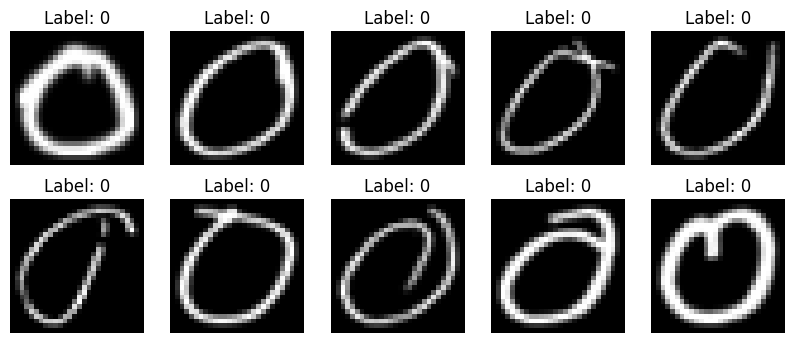

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

train_dir = "/content/drive/MyDrive/Ai Herald/worksheet_4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Ai Herald/worksheet_4/DevanagariHandwrittenDigitDataset/Test"
image_height, image_width = 28, 28

def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sort class names from 0 to 9
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((image_width, image_height))  # Resize to (28, 28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, image_height, image_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, image_height, image_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shapes
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Use valid string 'gray' instead of '’gray’'
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(),  # Flatten the 28x28 image to a 784-dimensional vector
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(num_classes, activation="softmax"),
])


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

# Define parameters
num_classes = 10
input_shape = (28, 28, 1)

# Function to build the model using the Functional API
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Flatten layer: Flatten the 28x28x1 input into a vector
    x = keras.layers.Flatten()(inputs)

    # Hidden layers: Three dense layers with sigmoid activation
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)

    # Output layer: Dense layer with softmax activation for classification
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
functional_model = build_functional_model()

# Display the model summary
functional_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
batch_size = 128
epochs = 20
callbacks = [
     keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
     keras.callbacks.EarlyStopping(monitor="val_loss", patience=4), ]

history=model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)


Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9329 - loss: 0.2417 - val_accuracy: 0.9377 - val_loss: 0.2252
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9302 - loss: 0.2469 - val_accuracy: 0.9380 - val_loss: 0.2239
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9312 - loss: 0.2448 - val_accuracy: 0.9381 - val_loss: 0.2225
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9302 - loss: 0.2464 - val_accuracy: 0.9388 - val_loss: 0.2218
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9340 - loss: 0.2377 - val_accuracy: 0.9396 - val_loss: 0.2205
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9343 - loss: 0.2340 - val_accuracy: 0.9389 - val_loss: 0.2193
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9320 - loss: 0.2429 - val_accuracy: 0.9394 - val_loss: 0.2176
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9338 - loss: 0.2381 - val_accuracy: 0.

In [ ]:
# history = model.fit( x_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs, validation_split=0.15,
#                      callbacks=callbacks,
#                     )

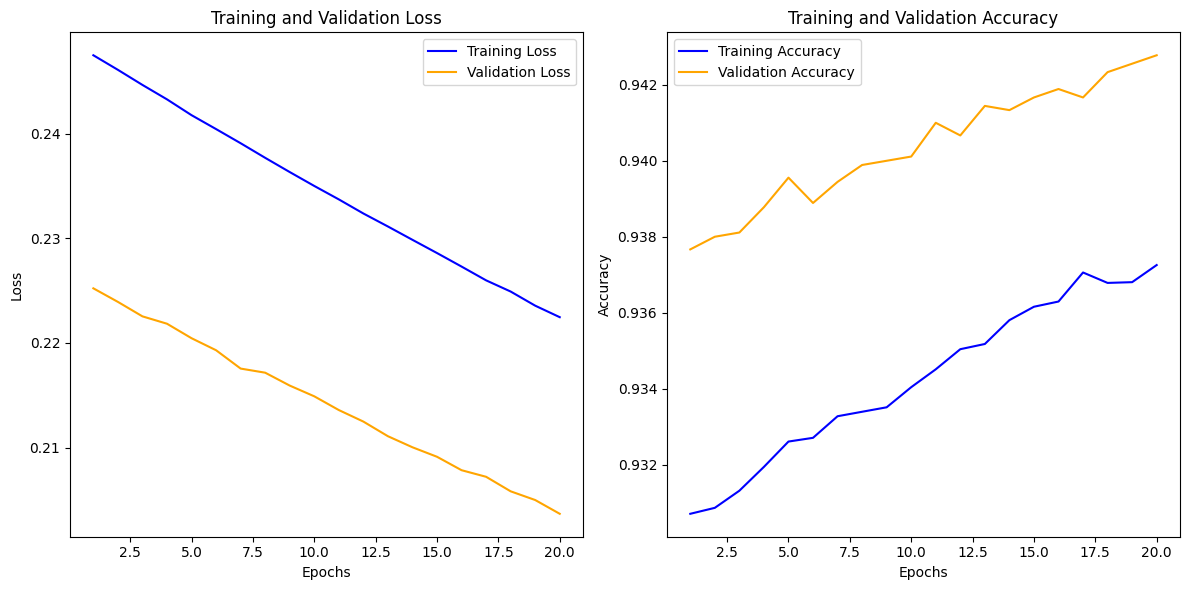

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Subplot for loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9388 - loss: 0.2191
Test accuracy: 0.9388


In [ ]:
#Predictontestdata
predictions=model.predict(x_test)
 #Convertpredictionsfromprobabilities todigitlabels
predicted_labels=np.argmax(predictions,axis=1)
  #Checkthefirstprediction
print(f"Predictedlabelforfirstimage: {predicted_labels[0]}")
print(f"Truelabelforfirstimage:{np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictedlabelforfirstimage: 7
Truelabelforfirstimage:7


In [ ]:
model.save('/content/drive/MyDrive/Ai Herald/worksheet_4/DevanagariHandwrittenDigitDataset/mnist_fully_connected_model.h5')
#all the weights and bias are saed in here

In [ ]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')

In [ ]:
loaded_model_prediction=loaded_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
np.argmax(loaded_model_prediction)
print(np.int64(39473))


39473


In [ ]:
print(np.shape(loaded_model_prediction))

(10000, 10)


In [ ]:
loaded_model_prediction.summary()

AttributeError: 'numpy.ndarray' object has no attribute 'summary'